# 1. Linear Regression

### 가상의 데이터로 예측하기

In [ ]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다. make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [ ]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 10)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [ ]:
data[1]

In [ ]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

input data :
[[-0.10046728]
 [-1.25019172]
 [ 0.828278  ]
 [ 1.3115358 ]
 [ 0.50553035]
 [-1.08927164]
 [ 1.14777374]
 [ 1.12835145]
 [ 1.5533055 ]
 [ 1.18578904]], 

 output data :
[1044.32651682  896.62210158 1047.77835248 1168.07226673 1016.71747744
  850.43361633 1138.52729016 1126.9076786  1073.07150098 1125.45854977]


- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수
- n_features : 기본값은 100, 독립변수의 수(차원), 정수
- n_target : 기본값은 1, 종속변수의 수, 정수
- bias = 기본값은 0.0, y절편, 실수
- nosie = 기본값은 0.0, 분포

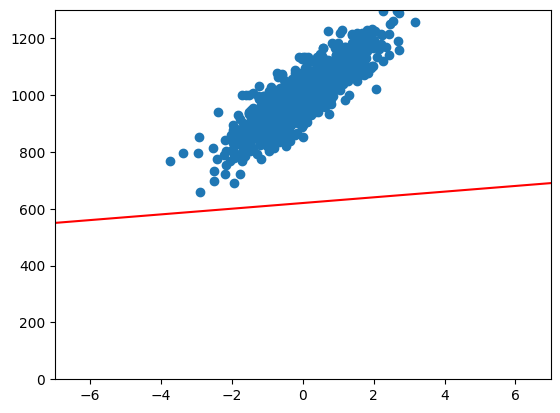

In [ ]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.plot([-7, 7], [550, 690], color="red")
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

#### 선형 모델을 만들어 보자.

In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True, random_state=75)

# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

In [ ]:
X_train[:5]

array([[ 1.42986791],
       [-0.34683268],
       [-0.56853849],
       [ 0.06091378],
       [-0.53330102]])

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용해도 된다.)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [ ]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# 단일피쳐 선형회귀 모델의 가설함수는?

y1 = x1 의 관계

H(x) = w1*x1 + w0

#### 생성한 모델을 학습시켜보자.

In [ ]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# fit 에서 일어나는 일에는 어떤 것들이 있을까?

모델이 학습할 때 일어나는 일들

1. cost 계산   
 cost = sum((y_pred - y_real)**2)/N  
 -> MSE  , y_pred:예측값,  y_real:실제값
2. 가중치를 업데이트 해준다. (10000)  
for i in range(10000):    
&nbsp;&nbsp;&nbsp;&nbsp;gradientDesent(cost) -> 구한 코스트를 통해 기울기를 계산하고, weigth를  기울기 반대방향으로 업데이트

#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [ ]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([66.80302497])

In [ ]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

999.8793533913381

H(x) = 66.80302497 *x1 + 999.8493533913381

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [ ]:
print("train data score : {:.2f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.2f}".format(model_linear.score(X_test, y_test)))

train data score : 0.97
test data score : 0.98


In [ ]:
# Trainset data 와 함께, Hypothesis (직선) 시각화해보기
# Testset data 와 함께, Hypothesis (직선) 시각화해보기

In [ ]:
import numpy as np
point_x = np.array([-7, 7]).reshape(-1, 1)  # 직선을 만들기 위한 x 값들

In [ ]:
model_linear.predict(point_x)  # 그것의 예측값

array([ 532.2581786 , 1467.50052818])

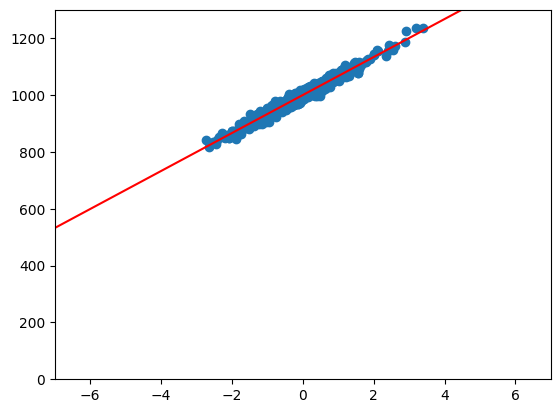

In [ ]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_train, y_train)
plt.plot(point_x, model_linear.predict(point_x), color="red")
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

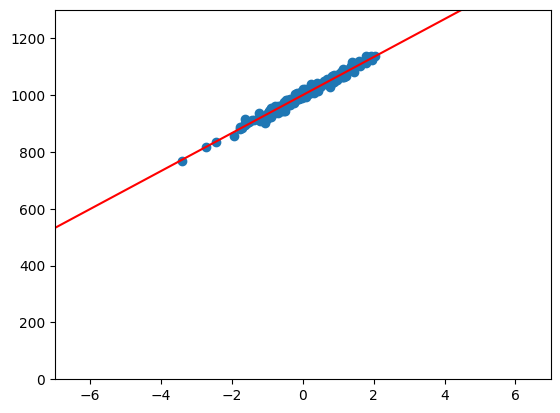

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(point_x, model_linear.predict(point_x), color="red")
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predcit() 명령어를 사용하여 y값을 예측합니다.

In [ ]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [ ]:
mse

88.62842522646886

In [ ]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [ ]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 88.628, RMSE : 9.414


In [ ]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.98


Quiz.
1. 회귀에서 r2 score를 사용하는 이유는 무엇일까?  
2. r2_score는 계산하는 식이 어떻게 될까?

Answer.
1. 내가 사용하는 데이터의 분산 정도를 오차에 나눠줌으로써 어느 정도 일괄된 성능평가지표로 사용할 수 있기 때문이다.
2. 1 - (오차/분산) => 1 - MSE / Var(y) => 1 - np.mean((y_predict - y_test)**2)/np.var(y_test)

In [ ]:
1 - np.mean((y_predict - y_test)**2)/np.var(y_test)

0.9800211640421943

- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.
- 모델의 성능만을 측정할때는 위의 번거로운 과정없이 score함수만을 활용하면 됩니다.

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 선형회귀를 해보자.

In [ ]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

input data : 
[[ 0.98080886 -0.26022609  0.81487982 -1.45186174  1.52306685 -0.33504705
   1.20763918  0.411853    0.72040033 -0.7767779   0.51135523 -0.61742447
   0.47026456 -2.1970489   1.17154402 -0.05785502 -1.31087552  0.25625877
   0.88939248  1.62708881  0.82824066  1.2179642  -0.18380662  0.13646514
  -0.52181025 -0.95786324  0.38674677 -1.15557939  0.44346392  1.22904634
  -2.50183358 -0.60600175  0.37009099  0.26126904  0.12583103 -0.86976895
  -1.0993428  -0.86968967 -0.18871081  1.62512083 -0.37437264 -0.33087861
   2.10070613 -1.32876086  2.23996288  0.46712092 -1.12636824  2.65307204
   0.11580828  0.27543961 -0.8215729  -1.48066204 -0.36070035 -0.51863095
   0.01171606 -0.88654071  0.45632872  0.06568152  0.06003339 -1.21120274
   0.14030115 -1.42614431 -1.12106709  0.09809389 -0.31777907 -1.45675253
  -1.32477501 -0.51149527  2.18044618 -0.63368539  0.28258089  0.84805027
  -1.57349037  0.37722412  0.29461381  0.97569552  1.01345283  0.83309555
   1.79758465 -0.7687662

여기서는 input data를 살펴보도록 하자.
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [ ]:
hypothesis_multi = LinearRegression()

# 가설함수는 어떻게 될까?
# H(x) = w0 + w1x1 + w2x2 + ...+ w100x100

In [ ]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [ ]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[-1.97731363e+00  5.65960171e-01 -1.21930749e+00  7.73565051e-01
  3.17726331e+01 -1.48878204e-01  1.20506258e+00  9.07571811e-01
 -2.63711950e+00 -8.38295373e-01 -3.58684537e+00  2.13764130e+00
  3.30050577e+00  8.61723242e-02 -2.93258422e+00 -1.24935357e+00
  2.20647397e+00  3.64196880e+00 -1.64559118e+00  6.34054349e+01
 -1.16572380e+00 -7.11353907e-01  9.92261800e-01  1.87623985e+00
  1.01952028e+00  1.69175292e+00  2.21732707e+00 -4.89422900e-01
  4.73585545e+01 -2.26564778e+00 -1.97826812e+00 -6.75303260e-02
  2.73743270e+01 -1.80116336e-01  1.89611093e+01 -1.35728177e+00
  4.52584516e+01 -1.61963293e-01 -1.63420725e+00 -2.91361283e+00
  1.86853164e+00  3.21072016e+00  3.22548485e-01 -3.91607751e-01
  8.28240403e-02 -2.85337025e+00 -1.37380907e+00  1.25507044e+00
 -2.07996024e+00 -4.03054403e-01 -5.14050224e-01 -2.20044324e+00
  2.88608163e+00  5.05408795e-01  3.39105668e+00  1.04905887e+00
 -6.27993478e-01 -1.52636936e+00 -1.22962976e+00  1.38800447e-01
  1.11185151e+0

In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.90
검증 데이터 점수 : 0.82


noise = 100

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_2,y_2 = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 100)

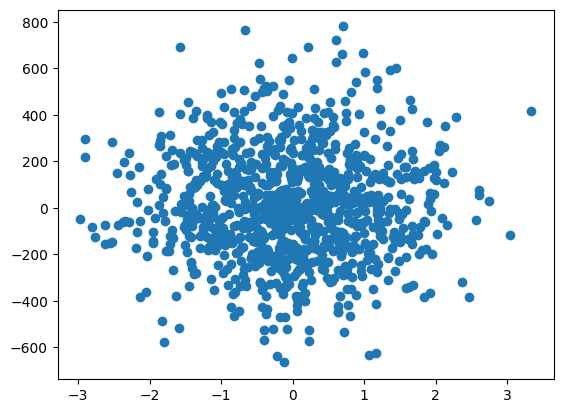

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_2[:, 11], y_2)    # 임의의 값을 슬라이싱
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2,
                                                    shuffle = True)
hypothesis_noise100 = LinearRegression()
model_linear_noise100 = hypothesis_noise100.fit(X_train, y_train)

In [ ]:
print('weight : \n{}\n\n'.format(model_linear_noise100.coef_))
print('bias : \n{}'.format(model_linear_noise100.intercept_))

weight : 
[-5.69895369e+00  3.44175439e+00  3.63349859e+00 -6.62996619e-01
  2.49557661e+00 -5.01785560e+00 -7.12723762e+00  2.10986857e+00
  8.57368546e-01  8.86298777e+00 -6.03600165e-01 -1.15206629e+00
  3.24784046e+01  8.03521568e+01 -1.68246757e+00 -2.54174803e+00
  2.39687112e+00 -2.21939744e+00 -2.93563361e+00 -6.93317742e-01
  5.15305036e+00 -2.83883256e+00  2.11526836e+01 -3.50267709e+00
  8.49753668e-01  1.67998385e+00 -3.01405917e+00  5.69382748e+00
  7.77093643e+01  4.64168427e+00 -2.17476420e+00 -3.85355913e-01
  3.99724333e+00  1.45440264e+00  3.64862251e+00 -8.00308434e+00
  2.99450198e+00 -8.20936396e+00 -4.11312530e+00 -3.81037063e+00
  2.78484972e+00 -1.17095290e+01  5.02748315e+00  3.93011988e+00
  1.01390297e+01  1.78254117e+00  1.06293302e+00 -6.01548261e+00
  2.63473938e+01  1.78157791e+00  3.12245022e+00  1.98361534e+00
  3.23788595e+00 -4.36138430e+00 -4.12725979e+00 -2.36739028e+00
 -1.49806182e+00  4.53334099e-01  4.43312664e-01 -6.39017341e+00
  3.03656848e+0

In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_test, y_test)))

학습 데이터 점수 : 0.83
검증 데이터 점수 : 0.76


make_regression을 이용해 가상 데이터를 생성할 때 noise의 값에 따른 결과를 보여주고 있다.

### 보스턴 주택데이터 예측하기

In [ ]:
from sklearn.datasets import load_boston

ImportError: ignored

In [ ]:
A = np.array([1,2,3])

In [ ]:
B = np.array([4,5,6])

In [ ]:
np.hstack([A, B]), np.vstack([A, B])

(array([1, 2, 3, 4, 5, 6]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
boston = load_boston()
boston

In [ ]:
boston['data']

In [ ]:
boston['target']

In [ ]:
boston['feature_names']

In [ ]:
boston['data'].shape, boston['target'].shape

In [ ]:
data.shape, target.shape

((506, 13), (506,))

In [ ]:
train_test_split?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
LinearRegression?

In [ ]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.03670702e-01  4.42301556e-02  1.35663079e-02  3.31884999e+00
 -1.48545938e+01  4.91716231e+00 -1.50282930e-02 -1.52405123e+00
  2.80781987e-01 -1.03715604e-02 -9.06453716e-01  1.22187362e-02
 -4.62112143e-01]

bias: 25.937050193795137


In [ ]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.7607772035207736, 0.5977989418116159)

In [ ]:
model_boston.predict(X_test)

array([24.45713701, 17.61810592, 17.68941111, 27.21960871,  8.79612728,
       20.1181474 , 31.20203205, 12.40426586,  4.10087168, 26.82388077,
       25.42042266, 25.86887024, 15.6672803 , 12.70281629, 24.99300605,
        9.6951299 , 16.52890182, 21.80905648, 12.35508863, 22.5404953 ,
       29.91607975, 19.81249604, 16.49510617, 12.65957954, 18.93050076,
       40.03234325, 19.41779297, 28.11206871, 19.07550067, 16.96272176,
       24.58457797, 27.31989352, 33.08977464, 15.79246248, 26.90889825,
       33.6545821 , 12.81579052, 20.34556662, 25.80390826, 11.00063878,
       19.54874935, 17.29622637, 15.60044574, 20.39755315, 33.70638061,
       32.24114483, 36.74101932, 25.07678503, 14.17713364, 22.96420854,
       27.71493707, 17.1941736 , 17.05883294, 26.22701394, 39.26433081,
       40.90817322, 13.50231138, 14.79881528, 27.16859221, 13.54567159,
       32.35428467, 20.25353688, 24.90357804, 18.7387876 , 20.19523423,
       20.94523684, 29.77958862, 24.23626317, 25.29282978, 22.05